In [133]:
import pandas as pd 
import numpy as np
import requests

### 2.2 Data Preparation

In [134]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [135]:
#download the datage
!wget $data

/bin/bash: wget: command not found


In [136]:
url = '/Users/ladipo/Downloads/data.csv'
df = pd.read_csv(url)

# Now you can work with the DataFrame 'df'
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [137]:
# response = requests.get(data)


# # Check if the request was successful
# if response.status_code == 200:
#     # Save the content to a file
#     with open("data.csv", "wb") as file:
#         file.write(response.content)
#     print("Download complete.")
# else:
#     print("Failed to download the file. Status code:", response.status_code)


In [138]:
# #turn all the headings in the column to lower case
# df = df.columns.str.lower().str.replace(' ', '_')

In [139]:
df.dtypes

df.dtypes[df.dtypes == 'object']  

Make                 object
Model                object
Engine Fuel Type     object
Transmission Type    object
Driven_Wheels        object
Market Category      object
Vehicle Size         object
Vehicle Style        object
dtype: object

In [140]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [141]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [142]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exploratory Data Analysis

In [143]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

Make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

Model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

Year
[2011 2012 2013 1992 1993]
28

Engine Fuel Type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

Engine HP
[335. 300. 230. 320. 172.]
356

Engine Cylinders
[ 6.  4.  5.  8. 12.]
9

Transmission Type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

Driven_Wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

Number of Doors
[ 2.  4.  3. nan]
3

Market Category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

Vehicle Size
['compact' 'midsize' 'large']
3

Vehicle Style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway MPG
[26 28 27 25 24]
59

city mpg
[19 20 18 17 16]
69

Popularity
[3916 3105  819  617 1013]
48

MSRP
[46135 40650 36350 29450 345

Distribution of Price


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [145]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

<Axes: xlabel='MSRP', ylabel='Count'>

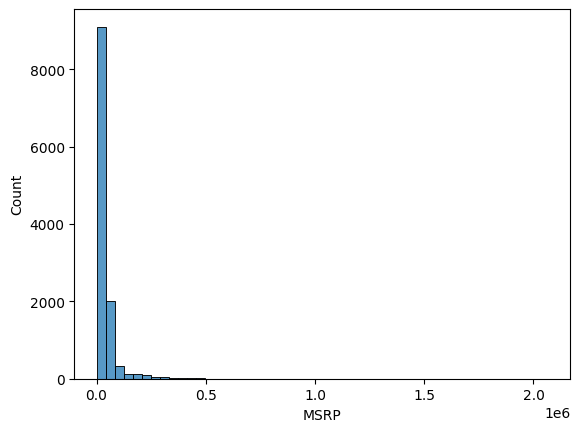

In [146]:
sns.histplot(df.MSRP, bins = 50)

<Axes: xlabel='MSRP', ylabel='Count'>

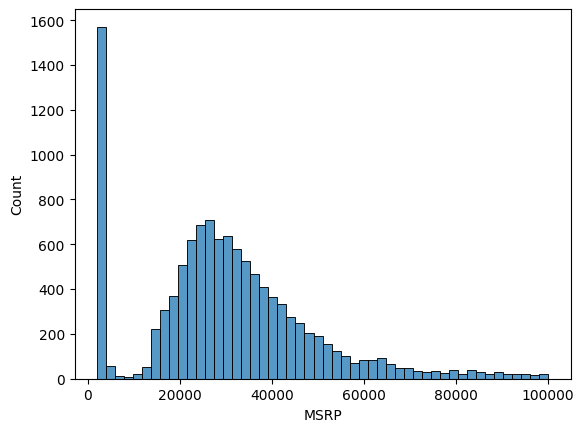

In [147]:
sns.histplot(df.MSRP[df.MSRP < 100000], bins = 50)

In [148]:
np.log([0, 1, 10, 1000, 100000])

/var/folders/89/43vk9m4d3752rwk6lyllddwh0000gp/T/ipykernel_11475/1040805571.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 1000, 100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [149]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [150]:
price_logs = np.log1p(df.MSRP)

<Axes: xlabel='MSRP', ylabel='Count'>

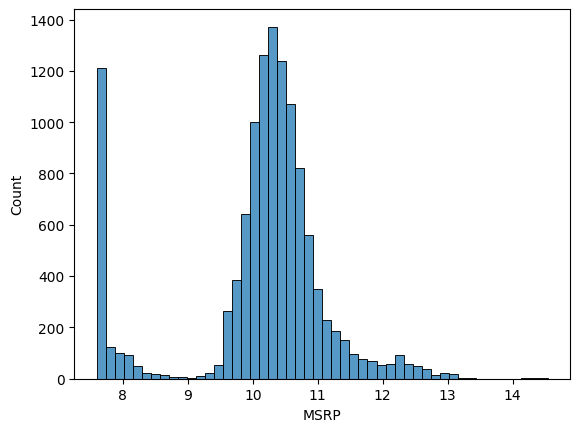

In [151]:
sns.histplot(price_logs, bins = 50)

The above graph now represents a normal distribution curve and will be mores suitable for the model. Long tail distributions confuse models

Missing Values

In [152]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [153]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [154]:
#defining feature matrix
xi = [453, 11, 86]
#define bias term
w0 = 0
#define the vectory (weight for each feature)
w = [1, 1, 1]

In [155]:
#this sums every element of the feature vecot, multiply by corresponding weight and added to the pred
def linear_regression(xi):
    # n is the length of the feature vector
    n = len(xi)
    #prediction
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    # do something 
    return pred

In [156]:
linear_regression(xi)

550

In [157]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + w[j] * xi[j]
    return res

In [158]:
def linear_regression(xi):
    # n is the length of the feature vector
    n = len(xi)
    
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return w0 + dot(xi, w)

### Linear Regression Vector Form 

In [159]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + w[j] * xi[j]
    return res

In [160]:
#dot product with features and weights
def linear_regression(xi):

    return w0 + dot(xi, w)

In [161]:
w_new = [w0] + w

In [162]:
#This notation appends 1 list to the beginning of the other
[1] + [1, 2, 3]

[1, 1, 2, 3]

In [163]:
#Adding a fictional feature to make it shorter
def linear_regression(xi):
    xi = [1] + xi

    return w0 + dot(xi, w)

In [164]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

#below will create a list of lists
X = [x1, x2, x10]

#Below will then turn it into a matrix using Numpy
X = np.array(X)

In [165]:
#Multiplication between matrix and vector
def linear_regression(X):
    X.dot(w_new)


### Training LR() Model

In [166]:
def train_lr(X, y):
    pass

In [197]:
#We had X with more columns than rows 
#Created a list of lists with more values to curb that
X = [
[148, 24, 1385],
[132, 25, 2031],
[453, 11, 86],
[148, 24, 1385],
[132, 25, 2031],
[453, 11, 86]
]

X = np.array(X)


In [198]:
#the result of this has more columns than rows - problematic? 
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86]])

In [217]:
#can't forget the bias term
#create 9 ones to be appended to the X array
# ones = np.ones(9)
ones = np.ones(X.shape[0]) #this method assigns a 1 to each column in the X.shape
ones

array([1., 1., 1., 1., 1., 1.])

In [218]:
#take to vectors and stack them together
X = np.column_stack([ones, X])

In [219]:
y= [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [220]:
#Implementing the gram matrix
XTX = X.T.dot(X)

In [224]:
#Getting the inverse
XTX_inv = np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [222]:
XTX_inv.dot(X.T).dot(y)

ValueError: shapes (3,3) and (6,6) not aligned: 3 (dim 1) != 6 (dim 0)

In [225]:
def train_lr(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]


In [ ]:
train_lr(X, y)

In [186]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [189]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [227]:
base = ['engine_hp', 'engine_cylinders' , 'number_of_doors', 
'highway_mpg', 'city_mpg', 'popularity']

In [228]:
#get subset of columns
df[base]

,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,335.0,6.0,2.0,26,19,3916
1,300.0,6.0,2.0,28,19,3916
2,300.0,6.0,2.0,28,20,3916
3,230.0,6.0,2.0,28,18,3916
4,230.0,6.0,2.0,28,18,3916
...,...,...,...,...,...,...
11909,300.0,6.0,4.0,23,16,204
11910,300.0,6.0,4.0,23,16,204
11911,300.0,6.0,4.0,23,16,204
11912,300.0,6.0,4.0,23,16,204


In [229]:
#extract values (numbers)
X_train = df[base].values


In [230]:
y_train

NameError: name 'y_train' is not defined

#### RMSE

In [ ]:
def rmse(y, y_pred):
    error = y - y_pred
    sqd_err = error ** 2 
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)


### Feature Engineering


In [232]:
#we can update year to age 
2024 - df.year

0        13
1        13
2        13
3        13
4        13
         ..
11909    12
11910    12
11911    12
11912    11
11913    18
Name: year, Length: 11914, dtype: int64

In [233]:
 def prepare_X(df):
    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X 

In [236]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

### Categorical Variables


In [249]:
for v in [2, 3, 4]:
    df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')

# Loop through values 2, 3, and 4 to create new columns
for v in [2, 3, 4]:
    # Create new column 'num_doors_v' where 1 indicates the number of doors is equal to v, and 0 otherwise
    df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')



In [250]:
#delete the extra columns that are no longer needed (multicollinearity)
# del df['num_doors_4']

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_of_doors,num_doors_%s,num_doors_2,num_doors_3,num_doors_4
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",...,coupe,26,19,3916,46135,0,0,1,0,0
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",...,convertible,28,19,3916,40650,0,0,1,0,0
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",...,coupe,28,20,3916,36350,0,0,1,0,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",...,coupe,28,18,3916,29450,0,0,1,0,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,...,convertible,28,18,3916,34500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",...,4dr_hatchback,23,16,204,46120,1,1,0,0,1
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",...,4dr_hatchback,23,16,204,56670,1,1,0,0,1
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",...,4dr_hatchback,23,16,204,50620,1,1,0,0,1
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",...,4dr_hatchback,23,16,204,50920,1,1,0,0,1


In [ ]:
 #Create a function to accomplish
 def prepare_X(df):
   df = df.copy()
   features = base.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2, 3, 4]:
      df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
      features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X 

In [255]:
#Looking at the most popular makes of cars 
df.make.value_counts().head()

#Getting the names of the cars 
makes = list(df.make.value_counts().head().index)

In [258]:
#  #for each make, we create 
 for v in makes:
      df['nmakes_%s' % v] = (df.make == v).astype('int')
      features.append('make_%s' % v)

In [261]:
categorical_var = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [264]:
#dictionary will contain top 5 for each category

categories = {}

for c in categorical_var:
    categories[c] = list(df[c].value_counts().head().index)

In [265]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

### Regularisation